## links uteis
### https://www.dataquest.io/blog/pandas-python-tutorial/
### https://blogs.technet.microsoft.com/machinelearning/2017/12/06/music-generation-with-azure-machine-learning/
### https://github.com/vishnubob/python-midi
### https://github.com/llSourcell/Music_Generator_Demo/blob/master/midi_manipulation.py

In [13]:
import pandas as pd

In [1]:
import midi

In [3]:
midifile = '/home/eurismar/notebooks/Music_Generator_Demo/Pop_Music_Midi//Blank Space - Verse.midi'

In [4]:
pattern = midi.read_midifile(midifile)

In [5]:
pattern

midi.Pattern(format=1, resolution=128, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[7, 161, 32]),
   midi.TrackNameEvent(tick=0, text='\x00', data=[0]),
   midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[1]),
   midi.NoteOnEvent(tick=128, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=65, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=65, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[

In [63]:
pattern.format

1

In [64]:
pattern.resolution

128

# The resolution is the number of pulses, or ticks, per quarter note (PPQ)

In [7]:
len(pattern) # numero de canais

3

In [9]:
len(pattern[0]) # numero de eventos canal 1

114

In [10]:
pattern[0][0]

midi.SetTempoEvent(tick=0, data=[7, 161, 32])

In [11]:
pattern[0][1]

midi.TrackNameEvent(tick=0, text='\x00', data=[0])

In [12]:
pattern[0][2]

midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8])

In [116]:
track = 0
tick = []
channel = []
data = []
name = []
tipo = []
data_0 = []
tick_acum = []
acum = 0
for evt in pattern[track]:
    if isinstance(evt, midi.NoteEvent):
      tick.append(evt.tick)
      channel.append(evt.channel)
      data.append(evt.data)
      name.append(evt.name)
      if evt.name=='Note On':
        tipo.append(1)
      else:
        tipo.append(0)
      data_0.append(evt.data[0])
      acum = acum + evt.tick
      tick_acum.append(acum)
    
df = pd.DataFrame(
    {'tick':tick,
     'channel':channel,
     'data':data,
     'data_0':data_0,
     'name':name,
     'tipo':tipo,
     'tick_acum':tick_acum
    }
)
df.head(10)

,channel,data,data_0,name,tick,tick_acum,tipo
0,1,"[60, 102]",60,Note On,128,128,1
1,1,"[60, 90]",60,Note Off,31,159,0
2,1,"[60, 102]",60,Note On,1,160,1
3,1,"[60, 90]",60,Note Off,31,191,0
4,1,"[60, 102]",60,Note On,65,256,1
5,1,"[60, 90]",60,Note Off,31,287,0
6,1,"[60, 102]",60,Note On,1,288,1
7,1,"[60, 90]",60,Note Off,31,319,0
8,1,"[60, 102]",60,Note On,65,384,1
9,1,"[60, 90]",60,Note Off,31,415,0


In [120]:
def getTrack(track=0):
    tick = []
    channel = []
    data = []
    name = []
    data_0 = []
    tick_acum = []
    tipo = []
    acum = 0
    for evt in pattern[track]:
        if isinstance(evt, midi.NoteEvent):
          tick.append(evt.tick)
          channel.append(evt.channel)
          data.append(evt.data)
          name.append(evt.name)
          if evt.name=='Note On':
            tipo.append(1)
          else:
            tipo.append(0)
          data_0.append(evt.data[0])
          acum = acum + evt.tick
          tick_acum.append(acum)
    
    df = pd.DataFrame(
        {'tick':tick,
         'channel':channel,
         'data':data,
         'data_0':data_0,
         'name':name,
         'tipo':tipo,
         'tick_acum':tick_acum
        }
    )
    return df

In [121]:
getTrack(0).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,1,"[60, 102]",60,Note On,128,128,1
1,1,"[60, 90]",60,Note Off,31,159,0
2,1,"[60, 102]",60,Note On,1,160,1
3,1,"[60, 90]",60,Note Off,31,191,0
4,1,"[60, 102]",60,Note On,65,256,1


In [122]:
getTrack(1).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,2,"[64, 81]",64,Note On,0,0,1
1,2,"[67, 81]",67,Note On,0,0,1
2,2,"[60, 81]",60,Note On,0,0,1
3,2,"[60, 90]",60,Note Off,126,126,0
4,2,"[64, 90]",64,Note Off,0,126,0


In [123]:
getTrack(2).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,3,"[48, 81]",48,Note On,0,0,1
1,3,"[48, 90]",48,Note Off,190,190,0
2,3,"[48, 59]",48,Note On,2,192,1
3,3,"[48, 90]",48,Note Off,60,252,0
4,3,"[48, 59]",48,Note On,4,256,1


In [127]:
df = getTrack(0)

In [128]:
df[['data_0','tipo','tick']]

,data_0,tipo,tick
0,60,1,128
1,60,0,31
2,60,1,1
3,60,0,31
4,60,1,65
5,60,0,31
6,60,1,1
7,60,0,31
8,60,1,65
9,60,0,31


In [131]:
%matplotlib inline

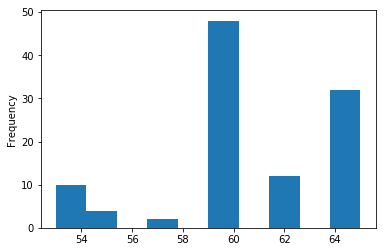

In [133]:
df['data_0'].plot(kind="hist")

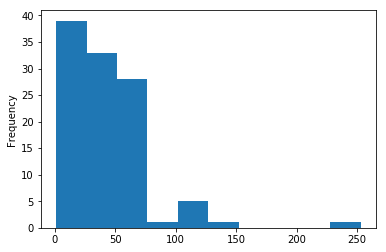

In [134]:
df['tick'].plot(kind="hist")